In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [4]:
df = pd.read_excel('KPMG.xlsx', sheetname="NewCustomerList",skiprows=1)

df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [5]:
df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [6]:
df['last_name']=df['last_name'].fillna(method='ffill')

In [7]:
df['DOB']=df['DOB'].fillna(method='ffill')

In [8]:
df['job_title'].value_counts()

Associate Professor                     15
Software Consultant                     14
Environmental Tech                      14
Chief Design Engineer                   13
Senior Sales Associate                  12
Assistant Media Planner                 12
Cost Accountant                         12
Assistant Manager                       12
VP Sales                                12
Nurse Practicioner                      11
Environmental Specialist                11
Social Worker                           11
Payment Adjustment Coordinator          11
VP Marketing                            11
Account Executive                       11
VP Quality Control                      11
Junior Executive                        11
Chemical Engineer                       10
Financial Analyst                       10
Product Engineer                        10
Librarian                               10
Dental Hygienist                        10
Structural Engineer                     10
Human Resou

In [9]:
df['job_title']=df['job_title'].fillna(method='bfill')

In [10]:
df['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [11]:
df['job_industry_category']=df['job_industry_category'].fillna(method='bfill')

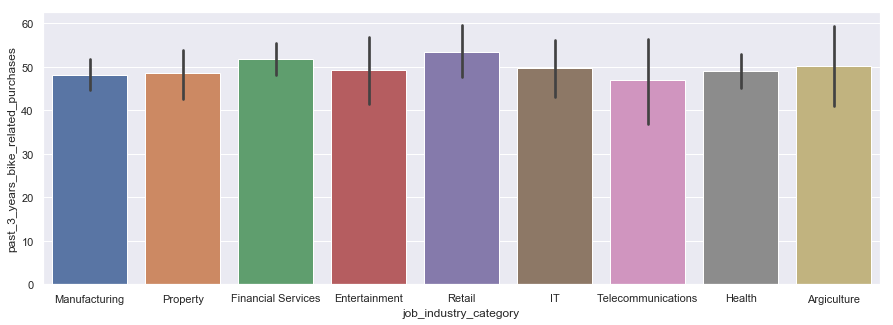

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x="job_industry_category", y='past_3_years_bike_related_purchases', data=df)

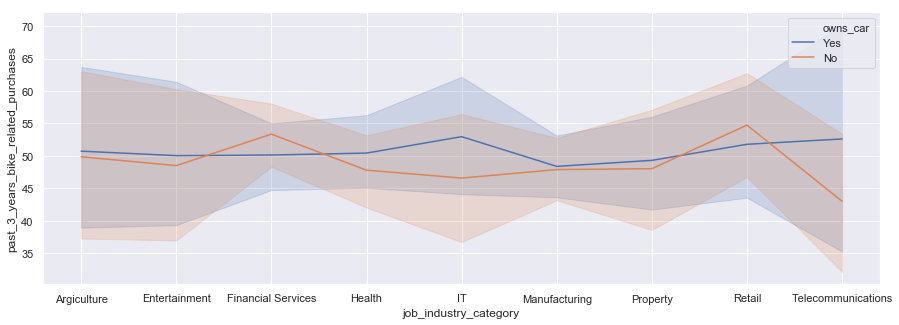

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(x="job_industry_category", y='past_3_years_bike_related_purchases',hue='owns_car', data=df)

[513, 470, 17]


([<matplotlib.axis.XTick at 0x2381efde828>,
 <a list of 6 Text xticklabel objects>)

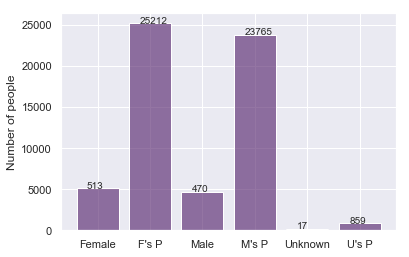

In [15]:
#Analyze the Gender vs Bikes bought
#array(['F', 'Male', 'Female', 'U', 'Femal', 'M'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))


([<matplotlib.axis.XTick at 0x2381f040f98>,
 <a list of 3 Text xticklabel objects>)

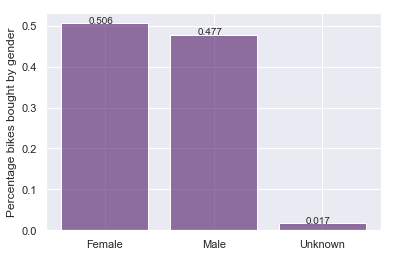

In [16]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [17]:
#check_unique()["Category"]
df["job_industry_category"].value_counts()

Manufacturing         246
Financial Services    230
Health                185
Retail                 86
Property               80
IT                     63
Entertainment          49
Telecommunications     31
Argiculture            30
Name: job_industry_category, dtype: int64

([<matplotlib.axis.XTick at 0x2381f2835c0>,
 <a list of 9 Text xticklabel objects>)

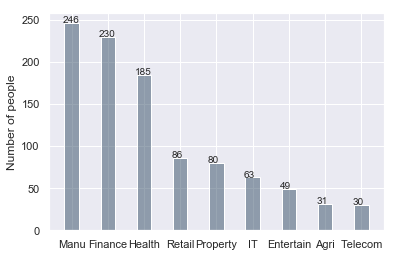

In [18]:
val = [246, 230, 185, 86, 80, 63, 49, 31, 30]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

In [20]:
df["state"].value_counts()


NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

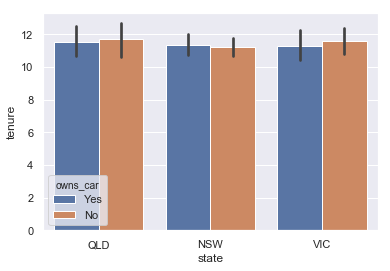

In [31]:
sns.barplot(x="state", y='tenure',hue='owns_car', data=df)